# Upper Confidence Bound algorithm

## Importing libraries

First step is importing the necessary libraries


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math as mt
import statistics

Import the data

In [13]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implement the algorithm

Number of selections and sum of rewards

In [14]:
N = 10000
d = 10

numberSelections = [0] * d
sumRewards = [0] * d
adsSelected = []
totalReward = 0

for n in range(0, N):
    
    maxUpperBound = 0
    ad = 0
    
    for i in range(0, d):
        
        if(numberSelections[i] > 0):
            averageReward = sumRewards[i]/numberSelections[i]
            deltaI = mt.sqrt(3/2 * mt.log(n + 1)/numberSelections[i])
            upperBound = averageReward + deltaI
        
        else:
            upperBound = 1e400
        if upperBound > maxUpperBound:
            maxUpperBound = upperBound
            ad = i
    
    adsSelected.append(ad)
    numberSelections[ad] = numberSelections[ad] + 1
    reward = dataset.values[n, ad]
    sumRewards[ad] = sumRewards[ad] + reward
    totalReward = totalReward + reward
    

        
        
    

The following line returns the most selected advertisement.

In [26]:
statistics.mode(adsSelected)

4

Now, time to see the results!!!

Text(0, 0.5, 'Number of selections')

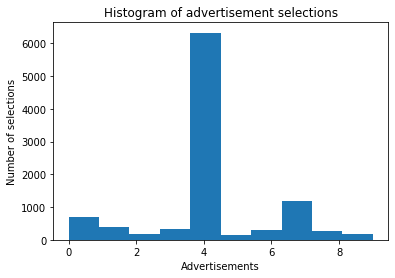

In [28]:
plt.hist(adsSelected)
plt.title("Histogram of advertisement selections")
plt.xlabel("Advertisements")
plt.ylabel("Number of selections")